#  GTA News 50 Clusters Chart

## Load 50 cluster dataframe

In [1]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
from collections import Counter

# directories
dir_path = os.getcwd()
#print('Working dir: ' + dir_path)

local_path = dir_path + '\\..\\gta-news\\doc2vec\data\\'
df = pd.read_pickle(local_path+'backup'+'-gta.50'+'.pickle')

In [2]:
df.head()

,date,title,url,cluster,vector
0,2019-04-20,"""this is why we can't have nice things in nyc,...",http://dagblog.com/reader-blogs/why-we-cant-ha...,13,"[-0.47769657, 0.3672163, 0.23536347, 0.5756423..."
1,2019-04-20,rural book borrowing in peril as libraries sla...,http://easternontarionetwork.com/2019/04/20/ru...,13,"[-0.5722261, -0.26479113, -0.1152498, 0.664171..."
2,2019-04-20,"""discussing canada's new us-focused cannabis e...",http://www.benzinga.com/markets/cannabis/19/04...,11,"[0.54588157, -0.26139393, -0.18809983, -0.0384..."
3,2019-04-20,serea restaurant slated to open in hotel del c...,http://www.coronadonewsca.com/news/coronado_ho...,25,"[-0.28711024, -0.2106441, -0.61289483, 0.04533..."
4,2019-04-20,federal trial of vernon man accused of abducti...,http://www.courant.com/news/connecticut/hc-new...,46,"[0.062113207, 0.0157832, 0.23044105, 0.4720517..."


## Get cluster descriptions from titles

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('../gta-news/doc2vec'))
if module_path not in sys.path:
    sys.path.append(module_path)

import d2v_utils
skip_terms =['toronto','canada','canadian','ontario']
cluster_descr = []
clusters = df.groupby(['cluster'])['title']
for cluster, titles in clusters:
    #print("\nCluster: ", cluster)
    filtered_words = []
    for title in titles:
        t = title[0:-4]
        #print(">>>", t)
        tokens = d2v_utils.prepare_text_for_lda(t)
        tokens = [word for word in tokens if word not in skip_terms and not word.isdigit()]
        #print("  >", tokens)
        filtered_words = filtered_words + tokens
    count = Counter(filtered_words)
    current_clust_descr = count.most_common()[:10] 
    cluster_descr.append(current_clust_descr)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ibaranov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibaranov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
print(cluster_descr[0][0:5])
print(cluster_descr[1][0:5])
print(cluster_descr[2][0:5])
print(cluster_descr[3][0:5])
print(cluster_descr[4][0:5])
print(cluster_descr[5][0:5])

[('announce', 195), ('result', 47), ('cannabis', 44), ('update', 43), ('project', 43)]
[('refugee', 54), ('asylum', 47), ('snowden', 46), ('shelter', 45), ('grant', 30)]
[('weather', 22), ('winter', 21), ('storm', 16), ('school', 11), ('sweep', 9)]
[('cannabis', 69), ('store', 26), ('legal', 17), ('illegal', 14), ('medical', 14)]
[('woman', 21), ('survivor', 18), ('family', 16), ('years', 13), ('holocaust', 13)]
[('research', 19), ('university', 18), ('innovation', 14), ('company', 13), ('better', 13)]


In [212]:
def create_circular_mask(w, h, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    y, x = np.ogrid[:h, :w]
    mask = (y - center[1]) ** 2 + (x - center[0]) ** 2 > radius ** 2
    mask = 255 * mask.astype(int)
    
    return mask

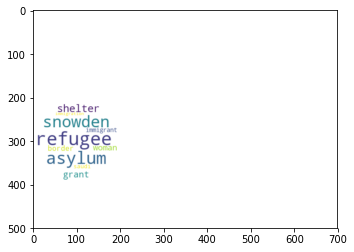

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud_num = 1

text = cluster_descr[cloud_num]
mask = create_circular_mask(700, 500, [100,300], 100)

wc = WordCloud(background_color="white", mask=mask,random_state=33, scale=1)
wc.generate_from_frequencies(dict(text))
wc.to_file("gta.wc.{0}.png".format(cloud_num))

#plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


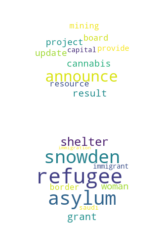

In [251]:
#plot 2 clouds on one image

fig = plt.figure()

mask = create_circular_mask(500, 500)
wc = WordCloud(background_color="white", mask=mask,random_state=33)
wc.generate_from_frequencies(dict(cluster_descr[0]))

ax = fig.add_subplot(2,1,1)
ax.imshow(wc, interpolation="bilinear")
ax.axis('off')

mask = create_circular_mask(200, 200)
wc2 = WordCloud(background_color="white", mask=mask,random_state=33)
wc2.generate_from_frequencies(dict(cluster_descr[1]))

ax = fig.add_subplot(2,1,2)
ax.imshow(wc2, interpolation="bilinear")
ax.axis('off')
plt.show()


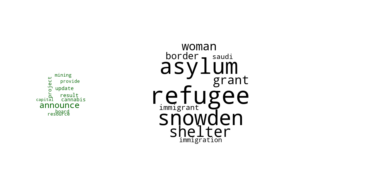

In [327]:
#plot 2 clouds on one image
import numpy.ma as ma
from PIL import Image

fig = plt.figure()

#plt.title('Wordcloud of GTA News')

# image 1
mask1 = create_circular_mask(1200, 500, [100,300], 100)
wc = WordCloud(background_color="white", mask=mask1, random_state=33, color_func=lambda *args, **kwargs: (0,100,0))
wc.generate_from_frequencies(dict(cluster_descr[0]))

# image 2
mask2 = create_circular_mask(1200, 500, [600,300], 200)
wc2 = WordCloud(background_color="white", mask=mask2, random_state=33, color_func=lambda *args, **kwargs: "black")
wc2.generate_from_frequencies(dict(cluster_descr[1]))

# blend images
# https://stackoverflow.com/questions/765736/using-pil-to-make-all-white-pixels-transparent

background = wc.to_image()

img = wc2.to_image().convert('RGBA')
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)

background.paste(img, (0, 0), img)

cloud_num = 9
background.save("gta.wc.{0}.png".format(cloud_num), "PNG")


plt.imshow(background, interpolation="bilinear")
plt.axis('off')

plt.show()


In [ ]:
decriptions = []
for row in cluster_descr:
    d=[]
    for token in row:
        d.append(token[0])
    decriptions.append(d)

data = df
description = []
for i, row in df.iterrows():
    description.append(decriptions[row['cluster']])

data['description'] = description

## Prepare the dataset

In [ ]:
df.head()

In [ ]:
# need dfAggr:
# date, cluster, count, description, x, y
dfAggr = df[['date','cluster','description']].groupby(['date','cluster'])\
    .first().sort_values(['date','cluster']).reset_index()

dfCount = df.groupby(['date','cluster'])['cluster']\
    .agg('count').to_frame('count')\
    .sort_values(['date','cluster']).reset_index()['count']

dfAggr['count'] = dfCount

# create topic string
topics = []
for i, row in dfAggr.iterrows():
    topics.append(', '.join(row['description'][0:2]))
dfAggr['topic'] = topics


# temporary RANDOM
import random
import numpy as np
random.seed(11)
dfAggr['x'] = 0.0
dfAggr['y'] = 0.0
sampl_x = np.random.uniform(low=0.0, high=50.0, size=(50,))
sampl_y = np.random.uniform(low=0.0, high=50.0, size=(50,))
for i, row in dfAggr.iterrows():
    dfAggr.at[i,'x'] = sampl_x[row.cluster]
    dfAggr.at[i,'y'] = sampl_y[row.cluster]

dfAggr.head(10)

## Cleaning dataset

In [ ]:
dfChart = dfAggr[['date','cluster','count','topic','x','y']].sort_values(['date','cluster'], ascending=[True,True])
#dfChart = dfChart[dfChart['count'] > 2]

#add 'day' column
new_year_day = pd.Timestamp(year=2019, month=1, day=1)
dfChart['day'] = 0
for i, row in dfChart.iterrows():
    dfChart.at[i,'day'] = (row['date'] - new_year_day).days + 1


dfChart[dfChart.day == 110].head(50)

## Add missing rows (chart is not working well without)

In [ ]:
num_clusters = 50

missing_rows = []
cur_day = -1
cl_num = 0
len_total = len(dfChart.index)
print(len_total)
for i, row in dfChart.iterrows():

    # day changed
    if cur_day != row.day:
        cur_day = row.day
        cl_num = 0
    
    # create missing cluster row(s) before row.cluster
    while cl_num != row.cluster:
        desc = ', '.join(decriptions[cl_num][0:2])
        d = pd.DataFrame(
            {'date':[row.date],'cluster':[cl_num],'count':[0],'topic':[desc],
             'x':[sampl_x[cl_num]],'y':[sampl_y[cl_num]],
             'day':[row.day]}
        )
        missing_rows.append(d)
        print ("Created missing row: day:" + str(row.day) + ", cluster:" + str(cl_num) + ", topic:" + desc)
        cl_num += 1
        if cl_num >= num_clusters:
            break

    # create missing cluster row(s) after row.cluster to end
    if i < len_total:
        if i == len_total -1:
            next_day = -1
        else:
            next_day = dfChart.at[i+1,'day']
        if next_day != cur_day:
            cl_num += 1
            while cl_num < num_clusters:
                desc = ', '.join(decriptions[cl_num][0:2])
                d = pd.DataFrame(
                    {'date':[row.date],'cluster':[cl_num],'count':[0],'topic':[desc],
                     'x':[sampl_x[cl_num]],'y':[sampl_y[cl_num]],
                     'day':[row.day]}
                )
                missing_rows.append(d)
                print ("Created missing row: day:" + str(row.day) + ", cluster:" + str(cl_num) + ", topic:" + desc)
                cl_num += 1
                if cl_num >= num_clusters:
                    break
            
    cl_num += 1

In [ ]:
dfChart2 = dfChart.append(missing_rows, sort=True)
dfChart2 = dfChart2.sort_values(['day','cluster'], ascending=[True,True])
dfChart2 = dfChart2.reset_index(drop=True)
dfChart2[dfChart2.day == 110].head()

## TODO: Project clustering to 2D using PCA

In [ ]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(x)
#principalDf = pd.DataFrame(data = principalComponents
#             , columns = ['principal component 1', 'principal component 2'])

## Plot

In [ ]:
import plotly_express as px
px.scatter(dfChart2, x="x", y="y", animation_frame="day", animation_group="topic",
           size="count", color="topic", hover_name="topic",
           size_max=150, range_x=[-5,55], range_y=[-5,55])